# Lead Scoring Case Study

## Data Dictionary
All the variables in the data anad their corresponding explaination.<br><br>
| Variables | Description |
|-----------|-------------|
|Prospect ID|A unique ID with which the customer is identified.|
|Lead Number|A lead number assigned to each lead procured.|
|Lead Origin|The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.|
|Lead Source|The source of the lead. Includes Google, Organic Search, Olark Chat, etc.|
|Do Not Email|An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.|
|Do Not Call|An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.|
|**Converted**|**The target variable. Indicates whether a lead has been successfully converted or not.**|
|TotalVisits|The total number of visits made by the customer on the website.|
|Total Time Spent on Website|The total time spent by the customer on the website.|
|Page Views Per Visit|Average number of pages on the website viewed during the visits.|
|Last Activity|Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.|
|Country|The country of the customer.|
|Specialization|The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.|
|How did you hear about X Education|The source from which the customer heard about X Education.|
|What is your current occupation|Indicates whether the customer is a student, umemployed or employed.|
|What matters most to you in choosing this course|An option selected by the customer indicating what is their main motto behind doing this course.|
|Search|Indicating whether the customer had seen the ad in any of the listed items.|
|Magazine||
|Newspaper Article||
|X Education Forums||
|Newspaper||
|Digital Advertisement||
|Through Recommendations|Indicates whether the customer came in through recommendations.|
|Receive More Updates About Our Courses|Indicates whether the customer chose to receive more updates about the courses.|
|Tags|Tags assigned to customers indicating the current status of the lead.|
|Lead Quality|Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.|
|Update me on Supply Chain Content|Indicates whether the customer wants updates on the Supply Chain Content.|
|Get updates on DM Content|Indicates whether the customer wants updates on the DM Content.|
|Lead Profile|A lead level assigned to each customer based on their profile.|
|City|The city of the customer.|
|Asymmetrique Activity Index|An index and score assigned to each customer based on their activity and their profile|
|Asymmetrique Profile Index||
|Asymmetrique Activity Score||
|Asymmetrique Profile Score||
|I agree to pay the amount through cheque|Indicates whether the customer has agreed to pay the amount through cheque or not.|
|a free copy of Mastering The Interview|Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.|
|Last Notable Activity|The last notable acitivity performed by the student.|

## Importing Required Libraries
Importing the required libraries for handling the data and building the models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from warnings import filterwarnings
filterwarnings("ignore")

pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
pd.set_option('display.max_colwidth',100)

## Importing the Data
Importing the data from the .csv file and viewing the shape and a sample of the data.

In [2]:
original_data = pd.read_csv('Leads.csv')
print(original_data.shape)
display(original_data.sample(n=5))

(9240, 37)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
7679,c6f9f1ee-0386-48d4-87a6-428a150411f3,590921,API,Olark Chat,No,No,0,0.0,0,0.00,Email Link Clicked,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Email Link Clicked
7831,7e7433ee-1523-4e56-81f7-d3f42fabfd70,589731,Landing Page Submission,Organic Search,No,No,0,5.0,164,1.67,Email Opened,India,Human Resource Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,01.High,13.0,18.0,No,Yes,Email Opened
3754,2b183e0f-e939-442e-a746-dbc76fddade1,624197,Landing Page Submission,Organic Search,Yes,No,0,5.0,82,5.00,Email Opened,India,International Business,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Other Cities of Maharashtra,NaN,NaN,NaN,NaN,No,Yes,Email Opened
6780,f838cf9b-a88c-42de-9709-57dbde489dd2,597853,Landing Page Submission,Direct Traffic,No,No,0,2.0,479,2.00,Email Opened,India,Marketing Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Tier II Cities,NaN,NaN,NaN,NaN,No,No,Email Opened
3135,9bfabccd-6f11-444d-98ed-f846ada0b2af,629872,Landing Page Submission,Direct Traffic,No,No,0,2.0,320,2.00,Email Opened,India,Marketing Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,NaN,NaN,NaN,NaN,No,Yes,Email Opened


In [3]:
df = original_data.copy(deep=True)

## Data Cleaning
Handling missing values, outliers and formatting the data correctly.

### Handling Missing Values

Visulaizing the distribution of the NULL values within the dataset.

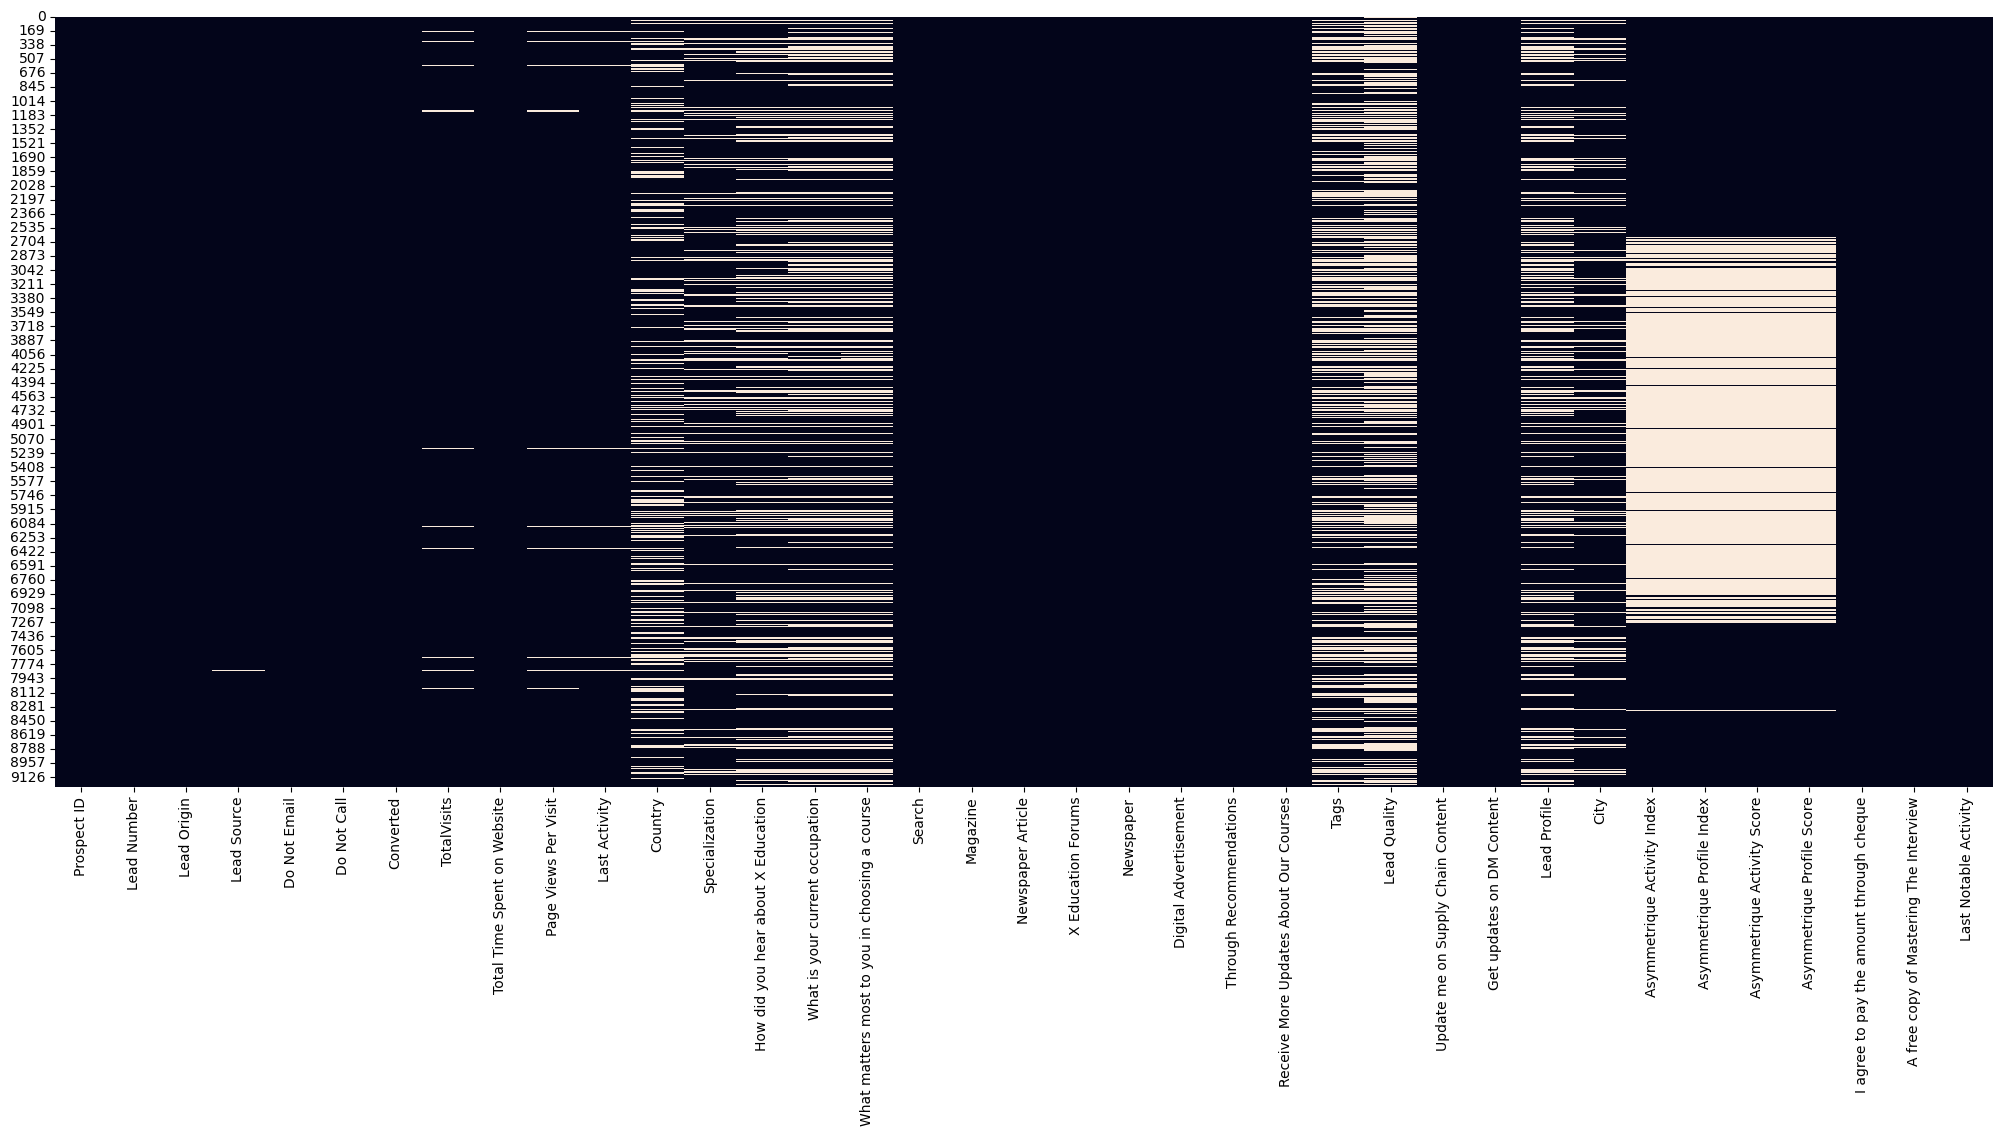

In [4]:
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Getting the %age of NULL values in the columns. If the percentage of mising values in the data is above a certain threshold(say 15-20%), we will have to analyze these fields and decide on weather to exclude them from further analysis and model building.

In [5]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0] * 100

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

#### Lead Quality

In [6]:
df['Lead Quality'].value_counts(dropna=False)

Lead Quality
NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

For `Lead Quality`:
- Values are missing for ~52% of the leads
- Values seen to be Missing Completely At Random(MCAR)
- Looking at the data definition, the variable is a subjective rating dependant on the employee handling the lead, which will vary from person to person

We will keep this column for model building as it seems important, if it is insignificant, we can drop it later.

In [7]:
df['Lead Quality'].replace({np.NaN:'No Information'}, inplace=True)
df['Lead Quality'].value_counts(dropna=False)

Lead Quality
No Information       4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

#### Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score and Asymmetrique Profile Score

In [8]:
display(df['Asymmetrique Activity Index'].value_counts(dropna=False))
display(df['Asymmetrique Profile Index'].value_counts(dropna=False))
display(df['Asymmetrique Activity Score'].value_counts(dropna=False))
display(df['Asymmetrique Profile Score'].value_counts(dropna=False))

Asymmetrique Activity Index
NaN          4218
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

Asymmetrique Profile Index
NaN          4218
02.Medium    2788
01.High      2203
03.Low         31
Name: count, dtype: int64

Asymmetrique Activity Score
NaN     4218
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: count, dtype: int64

Asymmetrique Profile Score
NaN     4218
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: count, dtype: int64

The four fields `Asymmetrique Activity Index`, `Asymmetrique Profile Index`, `Asymmetrique Activity Score` and `Asymmetrique Profile Score`:
- Are missing for ~46% of the leads
- Are missing for the same leads as visible in the plot and the numbers
- From the data definition, these values represent a Index and Score based on the Activity and Profile of the lead
- There is a clear direction to the values from "Low" -> "High" or a numerical scale

Imputing these values with mean, median or mode will:
- Completely skew and eliminate any usefulness of the field

Imputing these values with "No Information" will:
- Not make sense with for these fields
- Lead to a huge loss in interpretability of results

We will excluding these variables from further analysis and model building.

In [9]:
df.drop(labels=['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis='columns', inplace=True)

#### Tags

In [10]:
df['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

For `Tags`:
- ~36% of the values are missing
- Values seen to be Missing Completely At Random(MCAR)

We must not include this as it is a temporary status update, not an intrinsic quality of the lead.

In [11]:
df.drop(['Tags'], axis='columns', inplace=True)

#### Lead Profile

In [12]:
df['Lead Profile'].value_counts(dropna=False)

Lead Profile
Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

For `Lead Profile`:
- Missing for ~29% of the leads
- Values seen to be Missing Completely At Random(MCAR)
- Have a value "Select", which I assume is the default option in a dropdown menu, so "Select" is equivalent to a NULL
- Including both NULL and "Select", data is missing for ~74% of the leads

Imputing these values with mode will:
- Completelty skew and eliminate any usefulness of the field

Imputing these values with "No Information" will:
- Lead to a massive loss in interpretability of results

We have to drop this field as three quarters of the fiels are missing.

In [13]:
df.drop(labels=['Lead Profile'], axis='columns', inplace=True)

#### What matters most to you in choosing a course

In [14]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

For `What matters most to you in choosing a course`:
- ~29% of the values are missing
- Values seen to be Missing Completely At Random(MCAR)
- Most of the other values are "Better Career Prospects"

We can keep this column for future analysis and model building.

In [15]:
df['What matters most to you in choosing a course'].replace({np.NaN:'No Information'}, inplace=True)
df['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
No Information               2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

#### What is your current occupation

In [16]:
df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

For `What is your current occupation`:
- ~29% of the values are missing
- Values seen to be Missing Completely At Random(MCAR)

We can impute this column with "No Information".

In [17]:
df['What is your current occupation'].replace({np.NaN:'No Information'}, inplace=True)
df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
No Information          2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

#### Country

In [18]:
df['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

For `Country`:
- Values are mising for ~27% of the leads
- Values seen to be Missing Completely At Random(MCAR)
- Most of the other values are "India"

Imputing the values with mode will:
- Make almost all the data as "India" which will make this field useless

Imputing the values with "No Information" will:
- Not make sense in this field as it will become one of the most frequent values and lead to loss in interpretability of the results

We can drop this column as well

In [19]:
df.drop(labels=['Country'], axis='columns', inplace=True)

#### How did you hear about X Education

In [20]:
df['How did you hear about X Education'].value_counts(dropna=False)

How did you hear about X Education
Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

For `How did you hear about X Education`:
- Missing for ~24% of the leads
- Values seen to be Missing Completely At Random(MCAR)
- Have a value "Select", which I assume is the default option in a dropdown menu, so "Select" is equivalent to a NULL
- Including both NULL and "Select", data is missing for ~78% of the leads

Imputing these values with mode will:
- Completelty skew and eliminate any usefulness of the field

Imputing these values with "No Information" will:
- Lead to a massive loss in interpretability of results

We have to drop this field as three quarters of the fiels are missing.

In [21]:
df.drop(labels=['How did you hear about X Education'], axis='columns', inplace=True)

#### Specialization

In [22]:
df['Specialization'].value_counts(dropna=False)

Specialization
Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

For `Specialization`:
- Missing for ~16% of the leads
- Values seen to be Missing Completely At Random(MCAR)
- Have a value "Select", which I assume is the default option in a dropdown menu, so "Select" is equivalent to a NULL
- Including both NULL and "Select", data is missing for ~37% of the leads

Imputing these values with mode will:
- Completelty skew and eliminate any usefulness of the field

Imputing these values with "No Information" will:
- Lead to some loss in interpretability of results
- Allow us to preserve this field for future analysis as this field seems important in predicting lead quality

We can impute the "Select" and NULL values with a "No Information" value and preserve this field for future analysis.

In [23]:
df['Specialization'].replace({np.NaN:'No Information', 'Select':'No Information'}, inplace=True)
df['Specialization'].value_counts(dropna=False)

Specialization
No Information                       3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

#### City

In [24]:
df['City'].value_counts(dropna=False)

City
Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

For `City`:
- Missing for ~15% of the leads
- Values seen to be Missing Completely At Random(MCAR)
- Have a value "Select", which I assume is the default option in a dropdown menu, so "Select" is equivalent to a NULL
- Including both NULL and "Select", data is missing for ~40% of the leads

Imputing these values with mode will:
- Completelty skew and eliminate any usefulness of the field

Imputing these values with "No Information" will:
- Lead to some loss in interpretability of results
- Allow us to preserve this field for future analysis as this field does contain important geographical information, which can be a very powerful indicator of lead conversion

We can impute the "Select" and NULL values with a "No Information" value and preserve this field for future analysis.

In [25]:
df['City'].replace({np.NaN:'No Information', 'Select':'No Information'}, inplace=True)
df['City'].value_counts(dropna=False)

City
No Information                 3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

#### Fields with very less missing values

- Page Views Per Visit: 1.48%
- TotalVisits: 1.48%
- Last Activity: 1.11%
- Lead Source: 0.39%

##### Page Views Per Visit

In [26]:
df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

Since the number of missing values is very less, we can impute this field with the mean

In [27]:
df['Page Views Per Visit'].replace({np.NaN:df['Page Views Per Visit'].mean()}, inplace=True)
df['Page Views Per Visit'].describe()

count    9240.000000
mean        2.362820
std         2.145333
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

##### TotalVisits

In [28]:
df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

Since the number of missing values is very less, we can impute this field with the mean

In [29]:
df['TotalVisits'].replace({np.NaN:df['TotalVisits'].mean()}, inplace=True)
df['TotalVisits'].describe()

count    9240.000000
mean        3.445238
std         4.818723
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

##### Last Activity

In [30]:
df['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

Since the number of missing values is very less, we can impute this field with the mode

In [31]:
df['Last Activity'].replace({np.NaN:df['Last Activity'].mode()[0]}, inplace=True)
df['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

##### Lead Source

In [32]:
df['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

Since the number of missing values is very less, we can impute this field with the mode

In [33]:
df['Lead Source'].replace({np.NaN:df['Lead Source'].mode()[0]}, inplace=True)
df['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

#### Final Check

In [34]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0] * 100

Prospect ID                                      0.0
Magazine                                         0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Lead Quality                                     0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
Lead Number                                      0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                

All missing values have been handled.

### Remove Skewed Data

Let's consider a threshold of 95%, i.e. if 95% of all the values in a field fall into the same category, we will drop the column as it won't be useful for analysis and model building with variation that low.

In [35]:
threshold = 0.95
cols_to_drop = []
for col in df.select_dtypes(object).columns:
    top_freq_percentage = df[col].value_counts(normalize=True).max()
    if top_freq_percentage >= threshold:
        cols_to_drop.append(col)
df.drop(columns=cols_to_drop, inplace=True)

print('Categorical fields that were dropped for being highly skewed:', cols_to_drop)

Categorical fields that were dropped for being highly skewed: ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


### Dropping "ID" variables, i.e. `Prospect ID` and `Lead Number`

In [36]:
df.drop(labels=['Prospect ID','Lead Number'], axis='columns', inplace=True)
print(df.shape)
display(df.sample(n=5))

(9240, 15)


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
933,API,Google,No,0,3.0,984,3.0,SMS Sent,No Information,Unemployed,Better Career Prospects,Might be,No Information,No,Modified
8440,Landing Page Submission,Direct Traffic,No,0,1.0,247,1.0,Converted to Lead,Travel and Tourism,No Information,No Information,No Information,Mumbai,Yes,Modified
4584,Landing Page Submission,Direct Traffic,No,1,6.0,954,3.0,Email Opened,Human Resource Management,Unemployed,Better Career Prospects,Low in Relevance,Other Metro Cities,Yes,Modified
7664,Landing Page Submission,Organic Search,No,1,4.0,5,4.0,SMS Sent,E-COMMERCE,No Information,No Information,No Information,Mumbai,Yes,SMS Sent
569,Landing Page Submission,Google,No,0,6.0,192,6.0,SMS Sent,IT Projects Management,No Information,No Information,No Information,Mumbai,No,Modified


### Checking the Data Formats

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   Last Activity                                  9240 non-null   object 
 8   Specialization                                 9240 non-null   object 
 9   What is your current occupation                9240 

The data types are correct for the fields, no need to convert them.

### Checking for Outliers in the Numerical Fields

Lets check for outliers using plots.

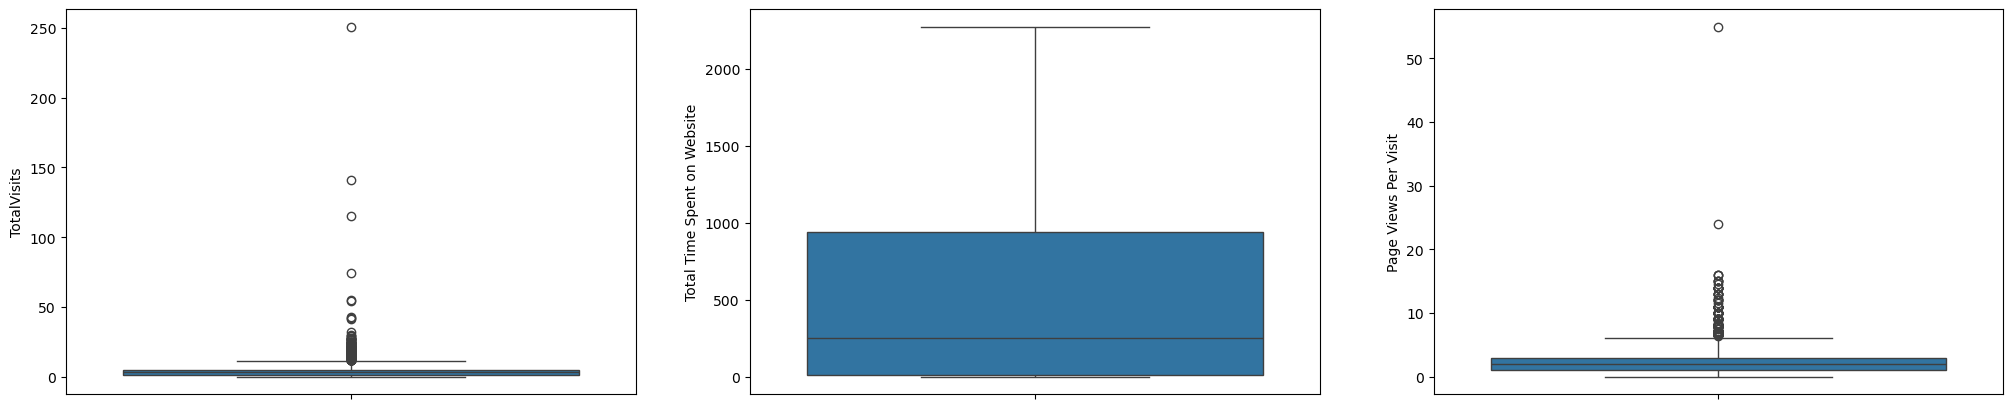

In [38]:
fig, axes = plt.subplots(1,3, figsize=(25,5))
sns.boxplot(data=df['TotalVisits'], ax=axes[0])
sns.boxplot(data=df['Total Time Spent on Website'], ax=axes[1])
sns.boxplot(data=df['Page Views Per Visit'], ax=axes[2])
plt.show()

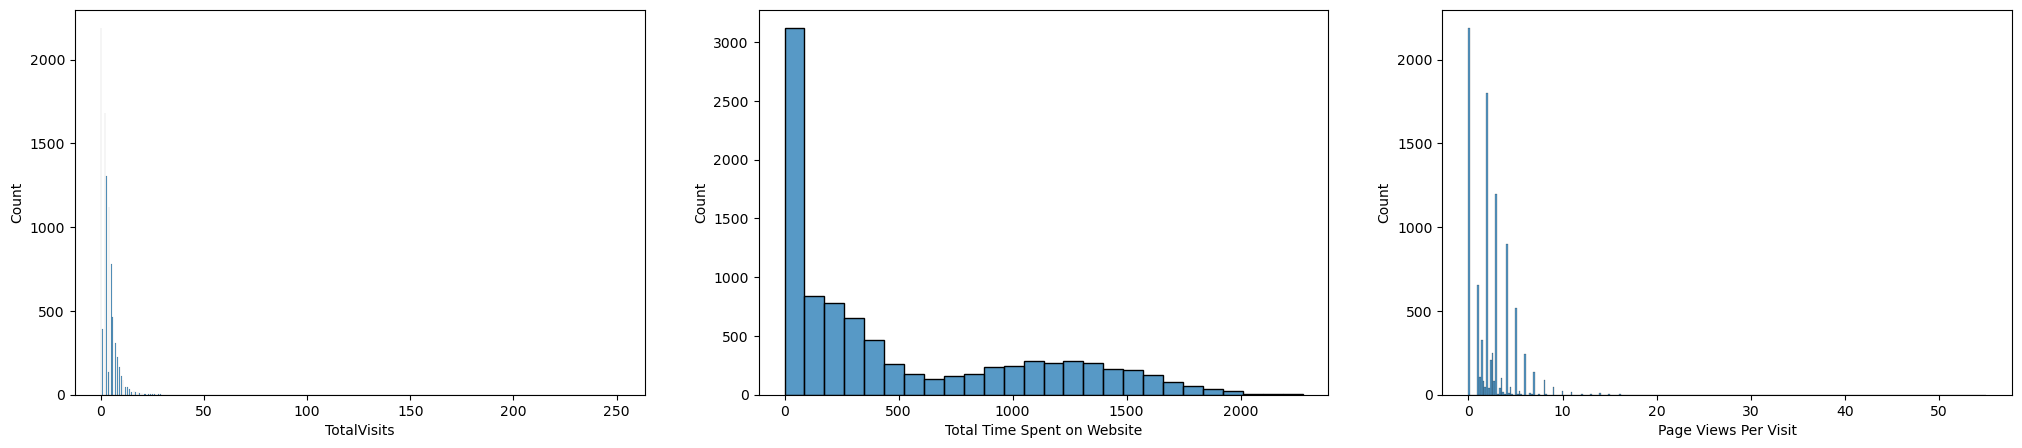

In [39]:
fig, axes = plt.subplots(1,3, figsize=(25,5))
sns.histplot(data=df['TotalVisits'], ax=axes[0])
sns.histplot(data=df['Total Time Spent on Website'], ax=axes[1])
sns.histplot(data=df['Page Views Per Visit'], ax=axes[2])
plt.show()

From the plots it is visible that:
- `Total Time Spent on Website` has no outliers
- `TotalVisits` and `Page Views Per Visit` have outliers

Let's see the number of outliers.

In [40]:
df_outliers = df[['TotalVisits','Page Views Per Visit']]
q1 = df_outliers.quantile(0.25)
q3 = df_outliers.quantile(0.75)
iqr = q3-q1

outliers = ((df_outliers<(q1-1.5*iqr)) | (df_outliers>(q3+1.5*iqr))).sum()
print(outliers)

TotalVisits             267
Page Views Per Visit    360
dtype: int64


Since the number of outliers is less, we can drop these rows.

In [41]:
outliers = ((df_outliers<(q1-1.5*iqr)) | (df_outliers>(q3+1.5*iqr)))
df = df.loc[~(outliers['TotalVisits']|outliers['Page Views Per Visit'])]

In [42]:
df.shape

(8679, 15)

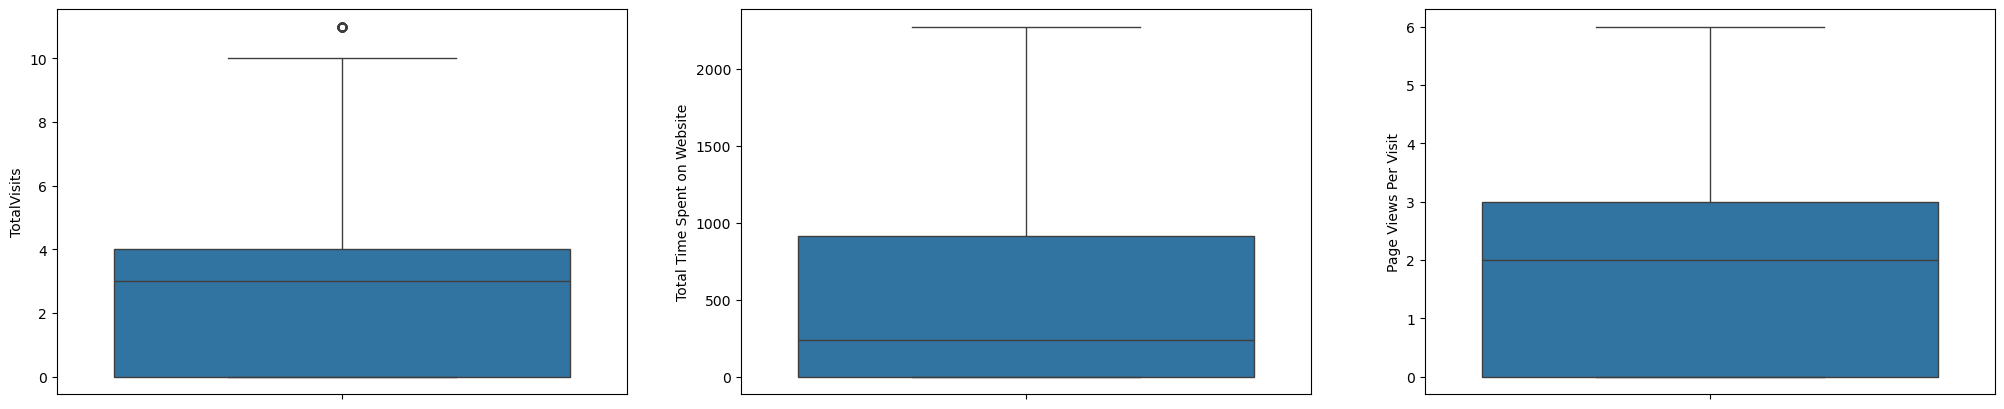

In [43]:
fig, axes = plt.subplots(1,3, figsize=(25,5))
sns.boxplot(data=df['TotalVisits'], ax=axes[0])
sns.boxplot(data=df['Total Time Spent on Website'], ax=axes[1])
sns.boxplot(data=df['Page Views Per Visit'], ax=axes[2])
plt.show()

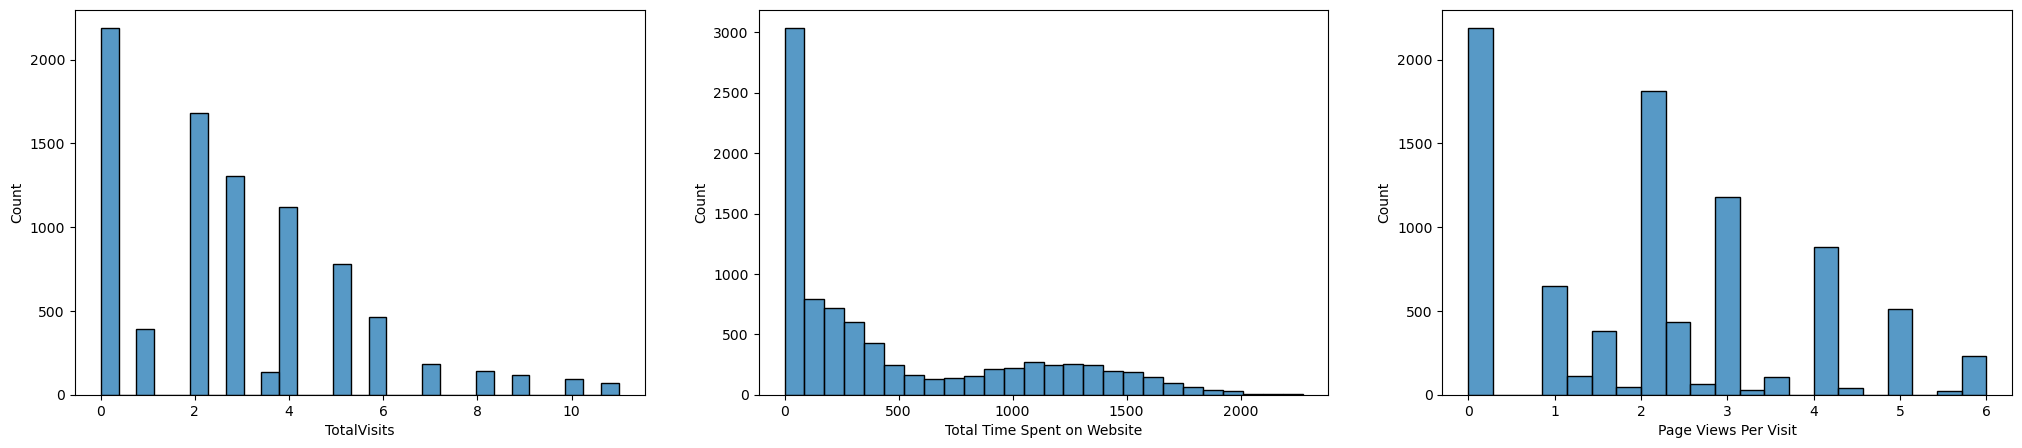

In [44]:
fig, axes = plt.subplots(1,3, figsize=(25,5))
sns.histplot(data=df['TotalVisits'], ax=axes[0])
sns.histplot(data=df['Total Time Spent on Website'], ax=axes[1])
sns.histplot(data=df['Page Views Per Visit'], ax=axes[2])
plt.show()

We can see that most of the outliers are removed.

## Exploratory Data Analysis
Lets visualize the relationships between the variables and the target variable

### Distribution of the Target Variable

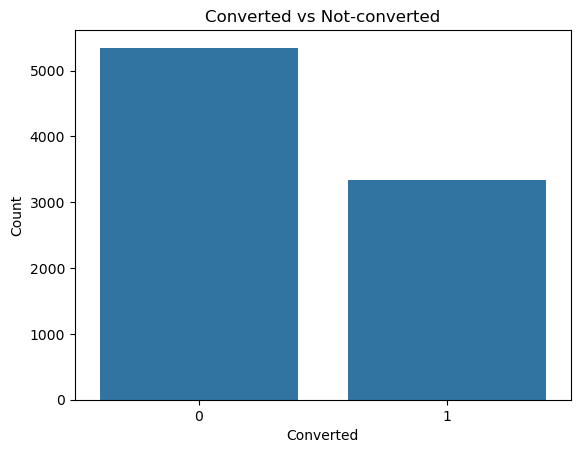

In [45]:
sns.countplot(x=df['Converted'])
plt.title('Converted vs Not-converted')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()

Disttribution of the classes is fine, no huge imbalance.

### Correlation between the Numeric Variables and the Target Variable

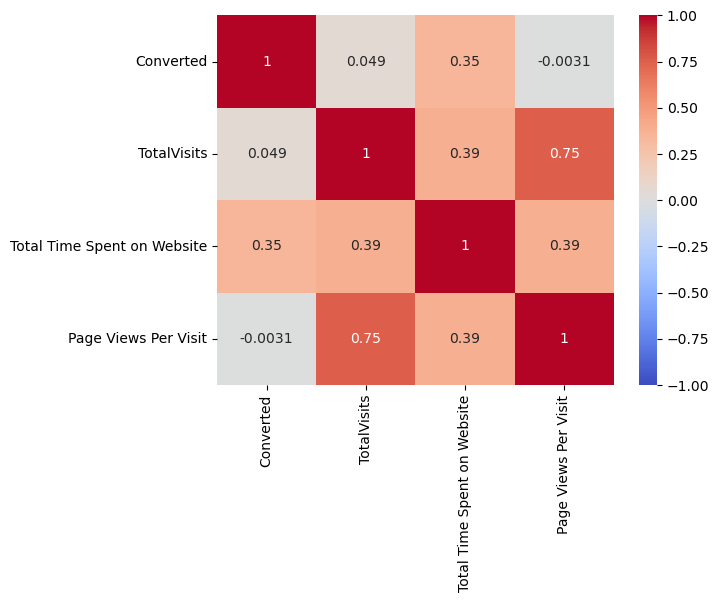

In [46]:
corr_df = df.corr(numeric_only=True)
sns.heatmap(corr_df, cmap='coolwarm', cbar=True, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

We can see that:
- There is not a significant correlation between any of the numeric columns to the target variable
- There is a correlation between `TotalVisits` and `Page Views Per Visit`

### Visualizing the Distribution of the Categorical Variables wrt the Target Variable

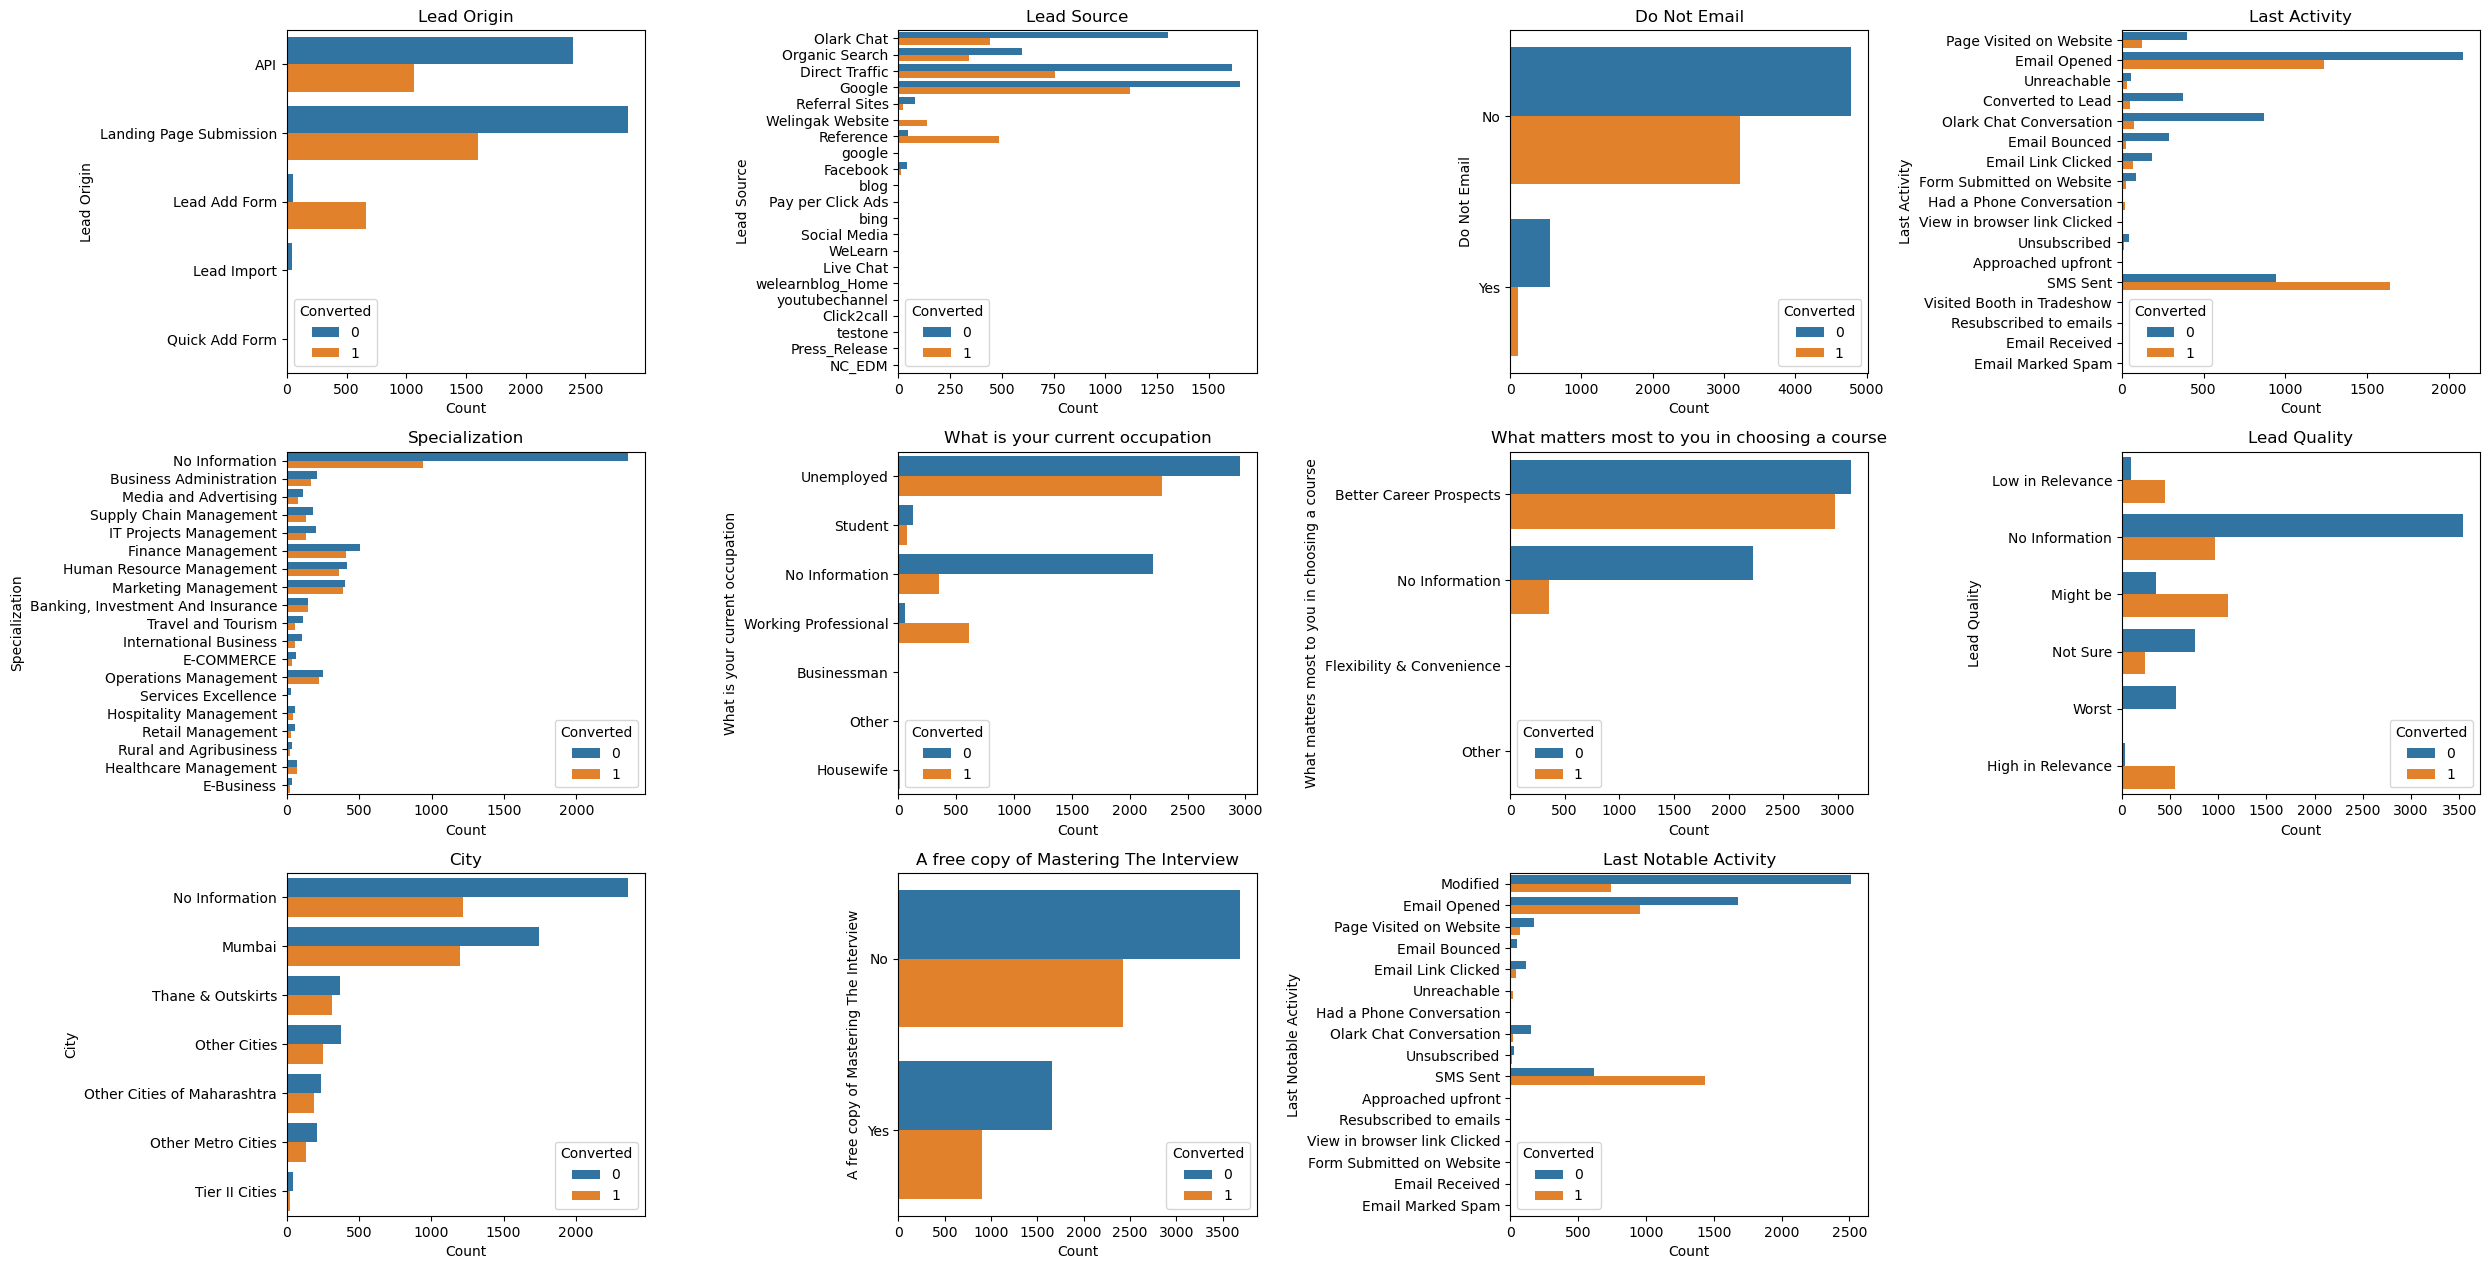

In [47]:
#Plotting categorical columns
object_columns = df.select_dtypes(object).columns

num_plots = len(object_columns)
rows = 6
cols = 4

# Create the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(25, 25))

# Flatten axes if there's only one row or column
if rows == 1:
    axes = axes.reshape(1, -1)
if cols == 1:
    axes = axes.reshape(-1, 1)

for i, column in enumerate(object_columns):
    row = i // cols
    col = i % cols
    sns.countplot(data=df, y=column, ax=axes[row, col], hue='Converted')
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('Count')
    axes[row, col].set_ylabel(column)

for j in range(i + 1, rows * cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

We can see that:
- In general for fields where we have imputed "No Information", we can see that when no information is provided, the conversion rates are much lower than if the data was provided, this could mean:
    * People who dont bother completely filling out the fields are less likely to be converted
- Some categorical columns have only one value, these would be eliminated in the model tuning part
- Some fields have very minimal values for certain categories, while encoding these values, we will have some columns with very bad predictive power, these will be eliminated in the model tuning part
- `Lead Origin`:
    * Highest lead generation is from Landing Page Submission & API but conversion rate is highest for Lead Add Form
- `Lead Source`:
    * Highest lead generation is from Google, Direct Traffic & olark Chat
    * Lead Conversion rate is high from Referece & Welingak Website
- `Do Not Email`:
    * Leads who has selected not to get Emails are less likely to be converted in compariosn to the ones who did not select this option
- `Last Activity`:
    * Mostly leads are getting generated when a customer is opening email or sms as last activity.
    * But conversion rate is higher for SMS sent
- `Specialization`:
    * Highest lead generation is for leads from Management
- `What is your current occupation`:
    * Leads from Unemployed sector are the highest
    * Conversion rate is good for Working Professionals & Unemployed
- `What matters most to you in choosing a course`:
    * Lead generation & conversion rate is high for people with Better Career Prospects as a reason for selecting this course
- `Last Notable Activity`: 
    * Conversion rate is higher for SMS sent

## Data Preprocessing
Convert the data into the final form before model building

In [48]:
print(df.shape)
display(df.sample(n=5))

(8679, 15)


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
2046,Landing Page Submission,Google,Yes,0,5.0,1287,2.50,Page Visited on Website,Business Administration,Unemployed,Better Career Prospects,No Information,Mumbai,Yes,Modified
6786,Landing Page Submission,Direct Traffic,No,0,4.0,469,4.00,SMS Sent,Human Resource Management,No Information,No Information,No Information,Other Cities of Maharashtra,No,Modified
7128,API,Organic Search,No,1,9.0,1115,2.25,Email Opened,Hospitality Management,Working Professional,Better Career Prospects,Might be,Other Cities,No,Email Opened
2893,Landing Page Submission,Google,No,0,4.0,1093,4.00,Email Opened,Marketing Management,Unemployed,Better Career Prospects,Not Sure,Mumbai,No,Email Opened
6524,Landing Page Submission,Google,No,0,2.0,172,2.00,Form Submitted on Website,Marketing Management,Unemployed,Better Career Prospects,No Information,Mumbai,No,Modified


### Converting Yes/No Fields to 0/1.
Yes/No Fields:
- `Do Not Email`
- `A free copy of Mastering The Interview`

In [49]:
yesNoFields = ['Do Not Email','A free copy of Mastering The Interview']
for column in yesNoFields:
    df[column].replace({'Yes':1, 'No':0}, inplace=True)
    df[column] = df[column].astype(int)

In [50]:
df.dtypes

Lead Origin                                       object
Lead Source                                       object
Do Not Email                                       int32
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Specialization                                    object
What is your current occupation                   object
What matters most to you in choosing a course     object
Lead Quality                                      object
City                                              object
A free copy of Mastering The Interview             int32
Last Notable Activity                             object
dtype: object

### Dummy Encoding the Categorical Variables

In [51]:
df_categorical_variables = df.select_dtypes(object)
df_numerical_variables = df.select_dtypes(np.number)

df_categorical_variables_encoded = pd.get_dummies(df_categorical_variables, drop_first=True, dtype=int)

df_encoded = pd.concat([df_numerical_variables, df_categorical_variables_encoded], axis='columns')

In [52]:
print(df_encoded.shape)
display(df_encoded.sample(n=5))

(8679, 99)


,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,...,Lead Quality_Might be,Lead Quality_No Information,Lead Quality_Not Sure,Lead Quality_Worst,City_No Information,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5052,0,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5704,1,0,2.0,39,2.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1960,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1084,0,0,1.0,225,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1647,0,1,2.0,1184,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Test-Train Split and Data Standardization

Test-train split

In [53]:
X = df_encoded.drop('Converted', axis='columns')
y = df_encoded['Converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Standardizing the data using StandardScaler

In [54]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

X_train_standard = pd.DataFrame(X_train_standard, columns=X.columns)
X_test_standard = pd.DataFrame(X_test_standard, columns=X.columns)

y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

## Model Building
Build the model and recurively eliminate features

### RFE
Since we have a lot of features, let us eliminate most of the features using RFE

In [55]:
logreg = LogisticRegression(random_state=1)
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train_standard, y_train)

In [56]:
columns_used_in_model_building = list(rfe.get_feature_names_out())
columns_used_in_model_building

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Olark Chat Conversation',
 'What is your current occupation_No Information',
 'What is your current occupation_Working Professional',
 'What matters most to you in choosing a course_No Information',
 'Lead Quality_Low in Relevance',
 'Lead Quality_Might be',
 'Lead Quality_No Information',
 'Lead Quality_Not Sure',
 'Lead Quality_Worst',
 'Last Notable Activity_SMS Sent']

### Manual Fine Tuning

#### Iteration 1

In [57]:
X_train_sm = sm.add_constant(X_train_standard[columns_used_in_model_building])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6943
Model:                            GLM   Df Residuals:                     6927
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2384.4
Date:                Mon, 17 Jun 2024   Deviance:                       4768.7
Time:                        18:17:39   Pearson chi2:                 6.81e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4763
Covariance Type:            nonrobust                                         
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

In [58]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[columns_used_in_model_building].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[columns_used_in_model_building].values, i) for i in range(X_train_sm[columns_used_in_model_building].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

,Features,VIF
8,What matters most to you in choosing a course_No Information,105.28
6,What is your current occupation_No Information,104.52
11,Lead Quality_No Information,5.34
10,Lead Quality_Might be,3.15
12,Lead Quality_Not Sure,2.65
13,Lead Quality_Worst,2.06
9,Lead Quality_Low in Relevance,1.84
2,Lead Origin_Lead Add Form,1.60
3,Lead Source_Olark Chat,1.47
4,Lead Source_Welingak Website,1.34


Let's remove one of the 2 variables with very high VIF and P-value, `What matters most to you in choosing a course_No Information`

In [59]:
columns_used_in_model_building.remove('What matters most to you in choosing a course_No Information')

#### Iteration 2

In [60]:
X_train_sm = sm.add_constant(X_train_standard[columns_used_in_model_building])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6943
Model:                            GLM   Df Residuals:                     6928
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2386.8
Date:                Mon, 17 Jun 2024   Deviance:                       4773.7
Time:                        18:17:40   Pearson chi2:                 6.82e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4759
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[columns_used_in_model_building].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[columns_used_in_model_building].values, i) for i in range(X_train_sm[columns_used_in_model_building].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

,Features,VIF
10,Lead Quality_No Information,5.34
9,Lead Quality_Might be,3.15
11,Lead Quality_Not Sure,2.65
12,Lead Quality_Worst,2.06
8,Lead Quality_Low in Relevance,1.84
6,What is your current occupation_No Information,1.71
2,Lead Origin_Lead Add Form,1.60
3,Lead Source_Olark Chat,1.47
4,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.33


Let's remove the variable `Lead Quality_No Information` because it has a VIF more than 5

In [62]:
columns_used_in_model_building.remove('Lead Quality_No Information')

#### Iteration 3

In [63]:
X_train_sm = sm.add_constant(X_train_standard[columns_used_in_model_building])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6943
Model:                            GLM   Df Residuals:                     6929
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2584.5
Date:                Mon, 17 Jun 2024   Deviance:                       5169.0
Time:                        18:17:40   Pearson chi2:                 7.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4452
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[columns_used_in_model_building].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[columns_used_in_model_building].values, i) for i in range(X_train_sm[columns_used_in_model_building].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
display(vif)

,Features,VIF
9,Lead Quality_Might be,1.59
6,What is your current occupation_No Information,1.54
2,Lead Origin_Lead Add Form,1.48
3,Lead Source_Olark Chat,1.47
1,Total Time Spent on Website,1.30
10,Lead Quality_Not Sure,1.30
4,Lead Source_Welingak Website,1.29
5,Last Activity_Olark Chat Conversation,1.29
7,What is your current occupation_Working Professional,1.26
8,Lead Quality_Low in Relevance,1.21


We can stop the iterations here as we have controlled both the P-values and VIFs

### Final Model Build and Results

#### Hyperparameter tuning

In [65]:
columns_used_in_model_building = tuple(columns_used_in_model_building)

X_train_final = X_train_standard[list(columns_used_in_model_building)]
X_test_final = X_test_standard[list(columns_used_in_model_building)]

In [66]:
logreg = LogisticRegression(max_iter=1000, random_state=1)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg']
}
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_final, y_train)
print('Best parameters:', grid_search.best_params_)
final_model = grid_search.best_estimator_

Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


#### Calculating prediction probabilities

In [67]:
y_train_prob = final_model.predict_proba(X_train_final)
y_test_prob = final_model.predict_proba(X_test_final)

y_train_data = pd.DataFrame({
    'Actual':y_train,
    'Prob0':y_train_prob[:,0],
    'Prob1':y_train_prob[:,1]
})
y_test_data = pd.DataFrame({
    'Actual':y_test,
    'Prob0':y_test_prob[:,0],
    'Prob1':y_test_prob[:,1]
})

## Conclusion 

MODEL RESULTS HERE

#### Plot the ROC curve

In [68]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

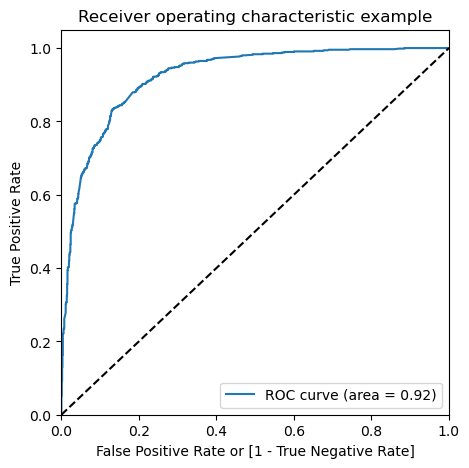

In [69]:
draw_roc(y_test, y_test_data['Prob1'])

#### Deciding the optimal threshold

In [70]:
for threshold in [round(0.01*i,2) for i in range(101)]:
    y_train_data[str(threshold)] = y_train_data['Prob1'].apply(lambda x: 1 if x>=threshold else 0)
    y_test_data[str(threshold)] = y_test_data['Prob1'].apply(lambda x: 1 if x>=threshold else 0)

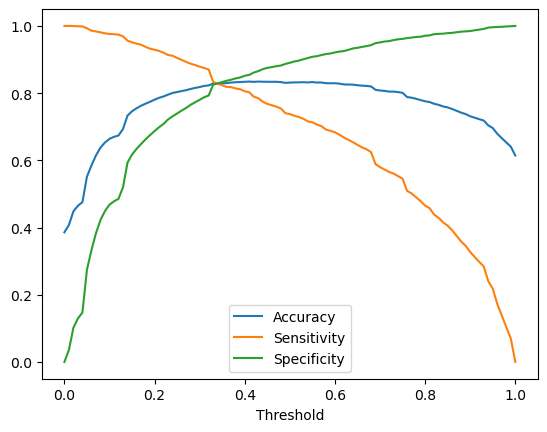

In [71]:
cutoff_df = pd.DataFrame(columns = ['Threshold','Accuracy','Sensitivity','Specificity','Precision','Recall'])
for threshold in [round(0.01*i,2) for i in range(101)]:
    cm = confusion_matrix(y_train_data['Actual'], y_train_data[str(threshold)])
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    preci = cm[1,1]/(cm[0,1]+cm[1,1])
    recal = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[threshold] =[threshold ,accuracy, sensi, speci, preci, recal]
cutoff_df.plot.line(x='Threshold', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [72]:
cutoff_df.loc[(cutoff_df['Threshold']>0.2)&(cutoff_df['Threshold']<0.4)]

,Threshold,Accuracy,Sensitivity,Specificity,Precision,Recall
0.21,0.21,0.786116,0.925691,0.698476,0.658433,0.925691
0.22,0.22,0.790148,0.920090,0.708558,0.664688,0.920090
0.23,0.23,0.795621,0.913368,0.721688,0.673273,0.913368
0.24,0.24,0.800519,0.911128,0.731067,0.680234,0.911128
0.25,0.25,0.803255,0.904780,0.739508,0.685625,0.904780
0.26,0.26,0.806136,0.898805,0.747948,0.691269,0.898805
0.27,0.27,0.808728,0.892830,0.755920,0.696678,0.892830
0.28,0.28,0.812473,0.887603,0.765299,0.703671,0.887603
0.29,0.29,0.815498,0.883495,0.772802,0.709445,0.883495
0.30,0.30,0.818090,0.878641,0.780070,0.714980,0.878641


0.34 looks like the appropriate threshold.

#### Precision vs Recall tradeoff

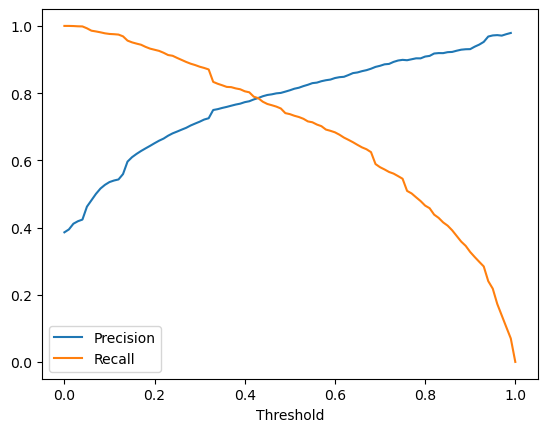

In [73]:
cutoff_df.plot.line(x='Threshold', y=['Precision','Recall'])
plt.show()

#### Check performance on the Train set

In [74]:
result_df = pd.DataFrame(columns = ['Threshold','Accuracy','Sensitivity','Specificity','Precision','Recall'])
for threshold in [round(0.01*i,2) for i in range(101)]:
    cm = confusion_matrix(y_test_data['Actual'], y_test_data[str(threshold)])
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    preci = cm[1,1]/(cm[0,1]+cm[1,1])
    recal = cm[1,1]/(cm[1,0]+cm[1,1])
    result_df.loc[threshold] =[threshold ,accuracy, sensi, speci, preci, recal]

In [75]:
result_df.loc[result_df['Threshold']==0.34]

,Threshold,Accuracy,Sensitivity,Specificity,Precision,Recall
0.34,0.34,0.845046,0.848624,0.842884,0.765517,0.848624


This model's performance is pretty good, we can use this for predictions and interpretations.

#### Create a lead score ranging from 0-100 for the leads

In [76]:
y_train_final = pd.DataFrame({'Actual':y_train, 'Prob':y_train_prob[:,1]})
y_train_final['Score'] = y_train_final['Prob'].map(lambda x: round(x*100))

y_test_final = pd.DataFrame({'Actual':y_test, 'Prob':y_test_prob[:,1]})
y_test_final['Score'] = y_test_final['Prob'].map(lambda x: round(x*100))

## Interpretation and Results

### Model Results 

- Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
- Decision Threshold: 0.34
- ROC AUC: 0.92
- Accuracy:
    * Test: 0.845046
    * Train: 0.828460
- Sensitivity:
    * Test: 0.848624
    * Train: 0.827857
- Specificity:
    * Test: 0.842884
    * Train: 0.828839
- Precision:
    * Test: 0.765517
    * Train: 0.752290
- Recall:
    * Test: 0.848624
    * Train: 0.827857

### Intercepts and Coefficients

In [77]:
print('Intercept:',final_model.intercept_)
model_intercepts = pd.DataFrame({'feature':final_model.feature_names_in_, 'coeff':final_model.coef_[0]})
model_intercepts['abs_coeff'] = model_intercepts['coeff'].apply(lambda x: abs(x))
model_intercepts.sort_values(['abs_coeff'], ascending=False, inplace=True, ignore_index=True)
display(model_intercepts)

Intercept: [-0.68342466]


,feature,coeff,abs_coeff
0,Total Time Spent on Website,1.005681,1.005681
1,Lead Origin_Lead Add Form,0.846557,0.846557
2,Lead Quality_Worst,-0.670501,0.670501
3,Last Notable Activity_SMS Sent,0.643665,0.643665
4,What is your current occupation_No Information,-0.522651,0.522651
5,Lead Source_Olark Chat,0.478064,0.478064
6,What is your current occupation_Working Professional,0.448799,0.448799
7,Last Activity_Olark Chat Conversation,-0.375709,0.375709
8,Lead Quality_Low in Relevance,0.366014,0.366014
9,Lead Quality_Not Sure,-0.337062,0.337062


### Interpretation

The most significant variables are:
- `Total Time Spent on Website`: This is the most important variable for the model, this shows that the more time the lead has spent on the website, the more likely he is to convert.
    * The top variable of the model
    * The coefficient is positive
    * This shows that the more time the lead spends on the website, they are more likely to convert
    * If a lead has spent more time on the website, we need to focus on converting them
- `Lead Origin_Lead Add Form`:
    * One of the top variables of the model
    * The coefficient is positive
    * This means that if the lead originated from "Lead Add Form", they are likely to convert
    * If a lead originated from "Lead Add Form", we need to focus on converting them
- `Lead Quality_Worst`:
    * One of the top variables of the model
    * The coefficient is negative
    * This means that if the lead quality has been labelled as "Worst", they are less likely to convert
    * If the lead has been labelled as "Worst", we should not focus on that lead
- `Last Notable Activity_SMS Sent`:
    * One of the top variables of the model
    * The coefficient is positive
    * If the lasty activity of the lead was sending the SMS, they are likely to convert
    * If the lead has sent the SMS, we need to focus on converting the lead
- `What is your current occupation_No Information`:
    * One of the top variables of the model
    * The coefficient is negative
    * This is quite unique, as this shows that if the lead has not filled the `What is your current occupation` field, they are less likely to convert
    * If the lead doesn't take the time to fill in the information, they are less likely to convert